In [1]:
#imports
%matplotlib inline

from PIL import Image
import urllib, cStringIO
import random

from astropy.io import fits as pyfits
from astropy.table import Table,join
import numpy as np
import os
from astropy.io.fits import Column
from datetime import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['text.usetex']=True

#function for getting galaxy images
def get_image_from_url(url):

    file = cStringIO.StringIO(urllib.urlopen(url).read())
    img = Image.open(file)
    return img

#table of galaxies - vote fractions and urls for getting images. 
data=Table.read('gzh_3_23_with_urls.fits')

#current threshold values:
cuts=Table.read('gzh_cuts.fits')
p_features_cut=cuts['p_features_cut'][0]
p_clumpy_no_cut=cuts['p_clumpy_no_cut'][0]
p_edgeon_no_cut = cuts['p_edgeon_no_cut'][0]

# Task 10: How tightly wound do the spiral arms appear?
# Task 11: How many spiral arms are there?



All of the above have identical previous tasks: 

Task 01: Is the galaxy smooth or featured? (answer featured) 

Task 12: Does the galaxy have a mostly clumpy appearance? (answer no) 

T02: Could this be a disk viewed edge-on? (answer no)

Task 04: Is there a sign of a spiral arm pattern? (answer yes) 

In [6]:
# Task 10: arms winding

#First define the task in question:
p_tight = 't10_arms_winding_a01_tight_weighted_fraction' # vote fraction for task
p_medium = 't10_arms_winding_a02_medium_weighted_fraction'
p_loose = 't10_arms_winding_a03_loose_weighted_fraction'
N_winding = 't10_arms_winding_total_weight' # number of votes for task


#and the previous tasks:
p_features = 't01_smooth_or_features_a02_features_or_disk_best_fraction' # vote fraction for previous task
p_clumpy_no = 't12_clumpy_a02_no_weighted_fraction' # vote fraction for previous task
p_edgeon_no = 't02_edgeon_a02_no_weighted_fraction' # vote fraction for previous task
p_spiral_yes = 't04_spiral_a01_spiral_weighted_fraction'

#how many minimum votes to be confident in vote fraction: 
N_cut = 20
min_N =  (data[N_winding]>=N_cut)

featured = (data[p_features]>p_features_cut)
not_clumpy = (data[p_clumpy_no]>p_clumpy_no_cut)
not_edgeon = (data[p_edgeon_no]>p_edgeon_no_cut)


# calculate average p_task in bins of p_prev_task, with width of dp = 0.1
p_prev_task_list = np.linspace(.05,.95,10)

fraction_list_tight=[]
err_list_tight=[]
fraction_list_medium=[]
err_list_medium=[]
fraction_list_loose=[]
err_list_loose=[]


for p in p_prev_task_list:
    task_data = (data[p_spiral_yes]>p-.05) & (data[p_spiral_yes]<p+.05) & min_N & featured & not_clumpy & not_edgeon

    #compute the average p_task in this bin
    N_in_bin = len(data[task_data])
    fraction_list_tight.append(np.nanmean(data[task_data][p_tight]))
    fraction_list_medium.append(np.nanmean(data[task_data][p_medium]))
    fraction_list_loose.append(np.nanmean(data[task_data][p_loose]))


    try:
        err_list_tight.append(np.nanstd(data[task_data][p_tight])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_tight.append(0)
    try:
        err_list_medium.append(np.nanstd(data[task_data][p_medium])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_medium.append(0)
    try:
        err_list_loose.append(np.nanstd(data[task_data][p_loose])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_loose.append(0)


y1_tight = [f+e for f,e in zip(fraction_list_tight,err_list_tight)]
y2_tight = [f-e for f,e in zip(fraction_list_tight,err_list_tight)]

y1_medium = [f+e for f,e in zip(fraction_list_medium,err_list_medium)]
y2_medium = [f-e for f,e in zip(fraction_list_medium,err_list_medium)]

y1_loose = [f+e for f,e in zip(fraction_list_loose,err_list_loose)]
y2_loose = [f-e for f,e in zip(fraction_list_loose,err_list_loose)]

# Task 11: arms number

#First define the task in question:
p_1 = 't11_arms_number_a01_1_weighted_fraction' # vote fraction for task
p_2 = 't11_arms_number_a02_2_weighted_fraction'
p_3 = 't11_arms_number_a03_3_weighted_fraction'
p_4 = 't11_arms_number_a04_4_weighted_fraction'
p_m4 = 't11_arms_number_a05_more_than_4_weighted_fraction'
p_ct = 't11_arms_number_a06_cant_tell_weighted_fraction'


N_number = 't10_arms_winding_total_weight' # number of votes for task


#how many minimum votes to be confident in vote fraction: 
N_cut = 20
min_N =  (data[N_number]>=N_cut)

# calculate average p_task in bins of p_prev_task, with width of dp = 0.1
p_prev_task_list = np.linspace(.05,.95,10)

fraction_list_1=[]
err_list_1=[]
fraction_list_2=[]
err_list_2=[]
fraction_list_3=[]
err_list_3=[]
fraction_list_4=[]
err_list_4=[]
fraction_list_m4=[]
err_list_m4=[]
fraction_list_ct=[]
err_list_ct=[]


for p in p_prev_task_list:
    task_data = (data[p_spiral_yes]>p-.05) & (data[p_spiral_yes]<p+.05) & min_N & featured & not_clumpy & not_edgeon

    #compute the average p_task in this bin
    N_in_bin = len(data[task_data])
    fraction_list_1.append(np.nanmean(data[task_data][p_1]))
    fraction_list_2.append(np.nanmean(data[task_data][p_2]))
    fraction_list_3.append(np.nanmean(data[task_data][p_3]))
    fraction_list_4.append(np.nanmean(data[task_data][p_4]))
    fraction_list_m4.append(np.nanmean(data[task_data][p_m4]))
    fraction_list_ct.append(np.nanmean(data[task_data][p_ct]))


    try:
        err_list_1.append(np.nanstd(data[task_data][p_1])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_1.append(0)
    try:
        err_list_2.append(np.nanstd(data[task_data][p_2])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_2.append(0)
    try:
        err_list_3.append(np.nanstd(data[task_data][p_3])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_3.append(0)
    try:
        err_list_4.append(np.nanstd(data[task_data][p_4])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_4.append(0)
    try:
        err_list_m4.append(np.nanstd(data[task_data][p_m4])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_m4.append(0)
    try:
        err_list_ct.append(np.nanstd(data[task_data][p_ct])/np.sqrt(N_in_bin))
    except TypeError:
        err_list_ct.append(0)

y1_1 = [f+e for f,e in zip(fraction_list_1,err_list_1)]
y2_1 = [f-e for f,e in zip(fraction_list_1,err_list_1)]

y1_2 = [f+e for f,e in zip(fraction_list_2,err_list_2)]
y2_2 = [f-e for f,e in zip(fraction_list_2,err_list_2)]

y1_3 = [f+e for f,e in zip(fraction_list_3,err_list_3)]
y2_3 = [f-e for f,e in zip(fraction_list_3,err_list_3)]

y1_4 = [f+e for f,e in zip(fraction_list_4,err_list_4)]
y2_4 = [f-e for f,e in zip(fraction_list_4,err_list_4)]

y1_m4 = [f+e for f,e in zip(fraction_list_m4,err_list_m4)]
y2_m4 = [f-e for f,e in zip(fraction_list_m4,err_list_m4)]

y1_ct = [f+e for f,e in zip(fraction_list_ct,err_list_ct)]
y2_ct = [f-e for f,e in zip(fraction_list_ct,err_list_ct)]


/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:1136: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


(0, 1)

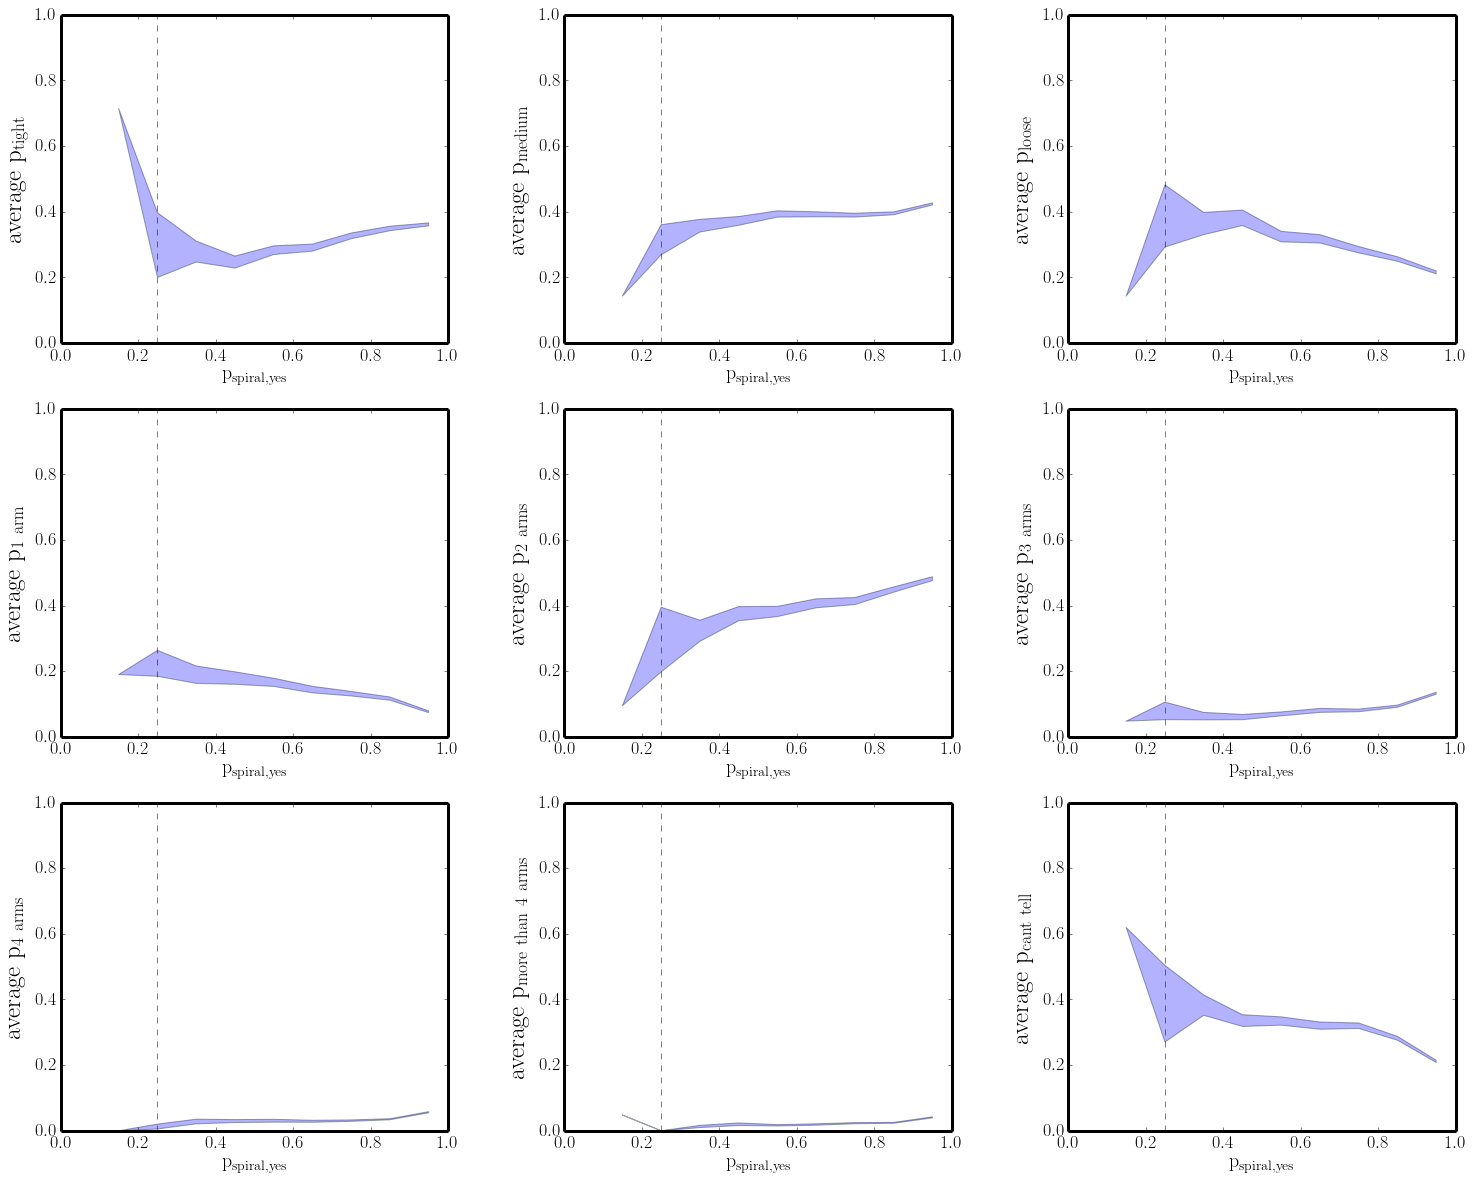

In [10]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18 

p_spiral_yes_cut = 0.25

f=plt.figure(figsize=(25,20))
gs=gridspec.GridSpec(3,3)
gs.update(wspace=.3)

#task 10
plt.subplot(gs[0,0])
plt.plot(p_prev_task_list,y1_tight,alpha=.1)
plt.plot(p_prev_task_list,y2_tight,alpha=.1)
plt.fill_between(p_prev_task_list,y1_tight,y2_tight,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{tight}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(gs[0,1])
plt.plot(p_prev_task_list,y1_medium,alpha=.1)
plt.plot(p_prev_task_list,y2_medium,alpha=.1)
plt.fill_between(p_prev_task_list,y1_medium,y2_medium,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{medium}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(gs[0,2])
plt.plot(p_prev_task_list,y1_loose,alpha=.1)
plt.plot(p_prev_task_list,y2_loose,alpha=.1)
plt.fill_between(p_prev_task_list,y1_loose,y2_loose,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{loose}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

#Task 11: 1-3 arms
plt.subplot(gs[1,0])
plt.plot(p_prev_task_list,y1_1,alpha=.1)
plt.plot(p_prev_task_list,y2_1,alpha=.1)
plt.fill_between(p_prev_task_list,y1_1,y2_1,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{1~arm}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(gs[1,1])
plt.plot(p_prev_task_list,y1_2,alpha=.1)
plt.plot(p_prev_task_list,y2_2,alpha=.1)
plt.fill_between(p_prev_task_list,y1_2,y2_2,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{2~arms}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(gs[1,2])
plt.plot(p_prev_task_list,y1_3,alpha=.1)
plt.plot(p_prev_task_list,y2_3,alpha=.1)
plt.fill_between(p_prev_task_list,y1_3,y2_3,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{3~arms}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

#Task 11: 4-ct arms
plt.subplot(gs[2,0])
plt.plot(p_prev_task_list,y1_4,alpha=.1)
plt.plot(p_prev_task_list,y2_4,alpha=.1)
plt.fill_between(p_prev_task_list,y1_4,y2_4,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{4~arms}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(gs[2,1])
plt.plot(p_prev_task_list,y1_m4,alpha=.1)
plt.plot(p_prev_task_list,y2_m4,alpha=.1)
plt.fill_between(p_prev_task_list,y1_m4,y2_m4,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{more~than~4~arms}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(gs[2,2])
plt.plot(p_prev_task_list,y1_ct,alpha=.1)
plt.plot(p_prev_task_list,y2_ct,alpha=.1)
plt.fill_between(p_prev_task_list,y1_ct,y2_ct,alpha=.3)

plt.ylabel(r'$\mathrm{average~p_{cant~tell}}$',fontsize=25)
plt.xlabel(r'$\mathrm{p_{spiral,yes}}$',fontsize=20)
plt.axvline(x=p_spiral_yes_cut,ls='dashed',color='k',alpha=.5)
plt.xlim(0,1)
plt.ylim(0,1)


## Below: Visually inspect galaxies for "arms winding/number candidates" - galaxies for which asking the arms winding/number questions make physical sense. These should be spiral galaxies.

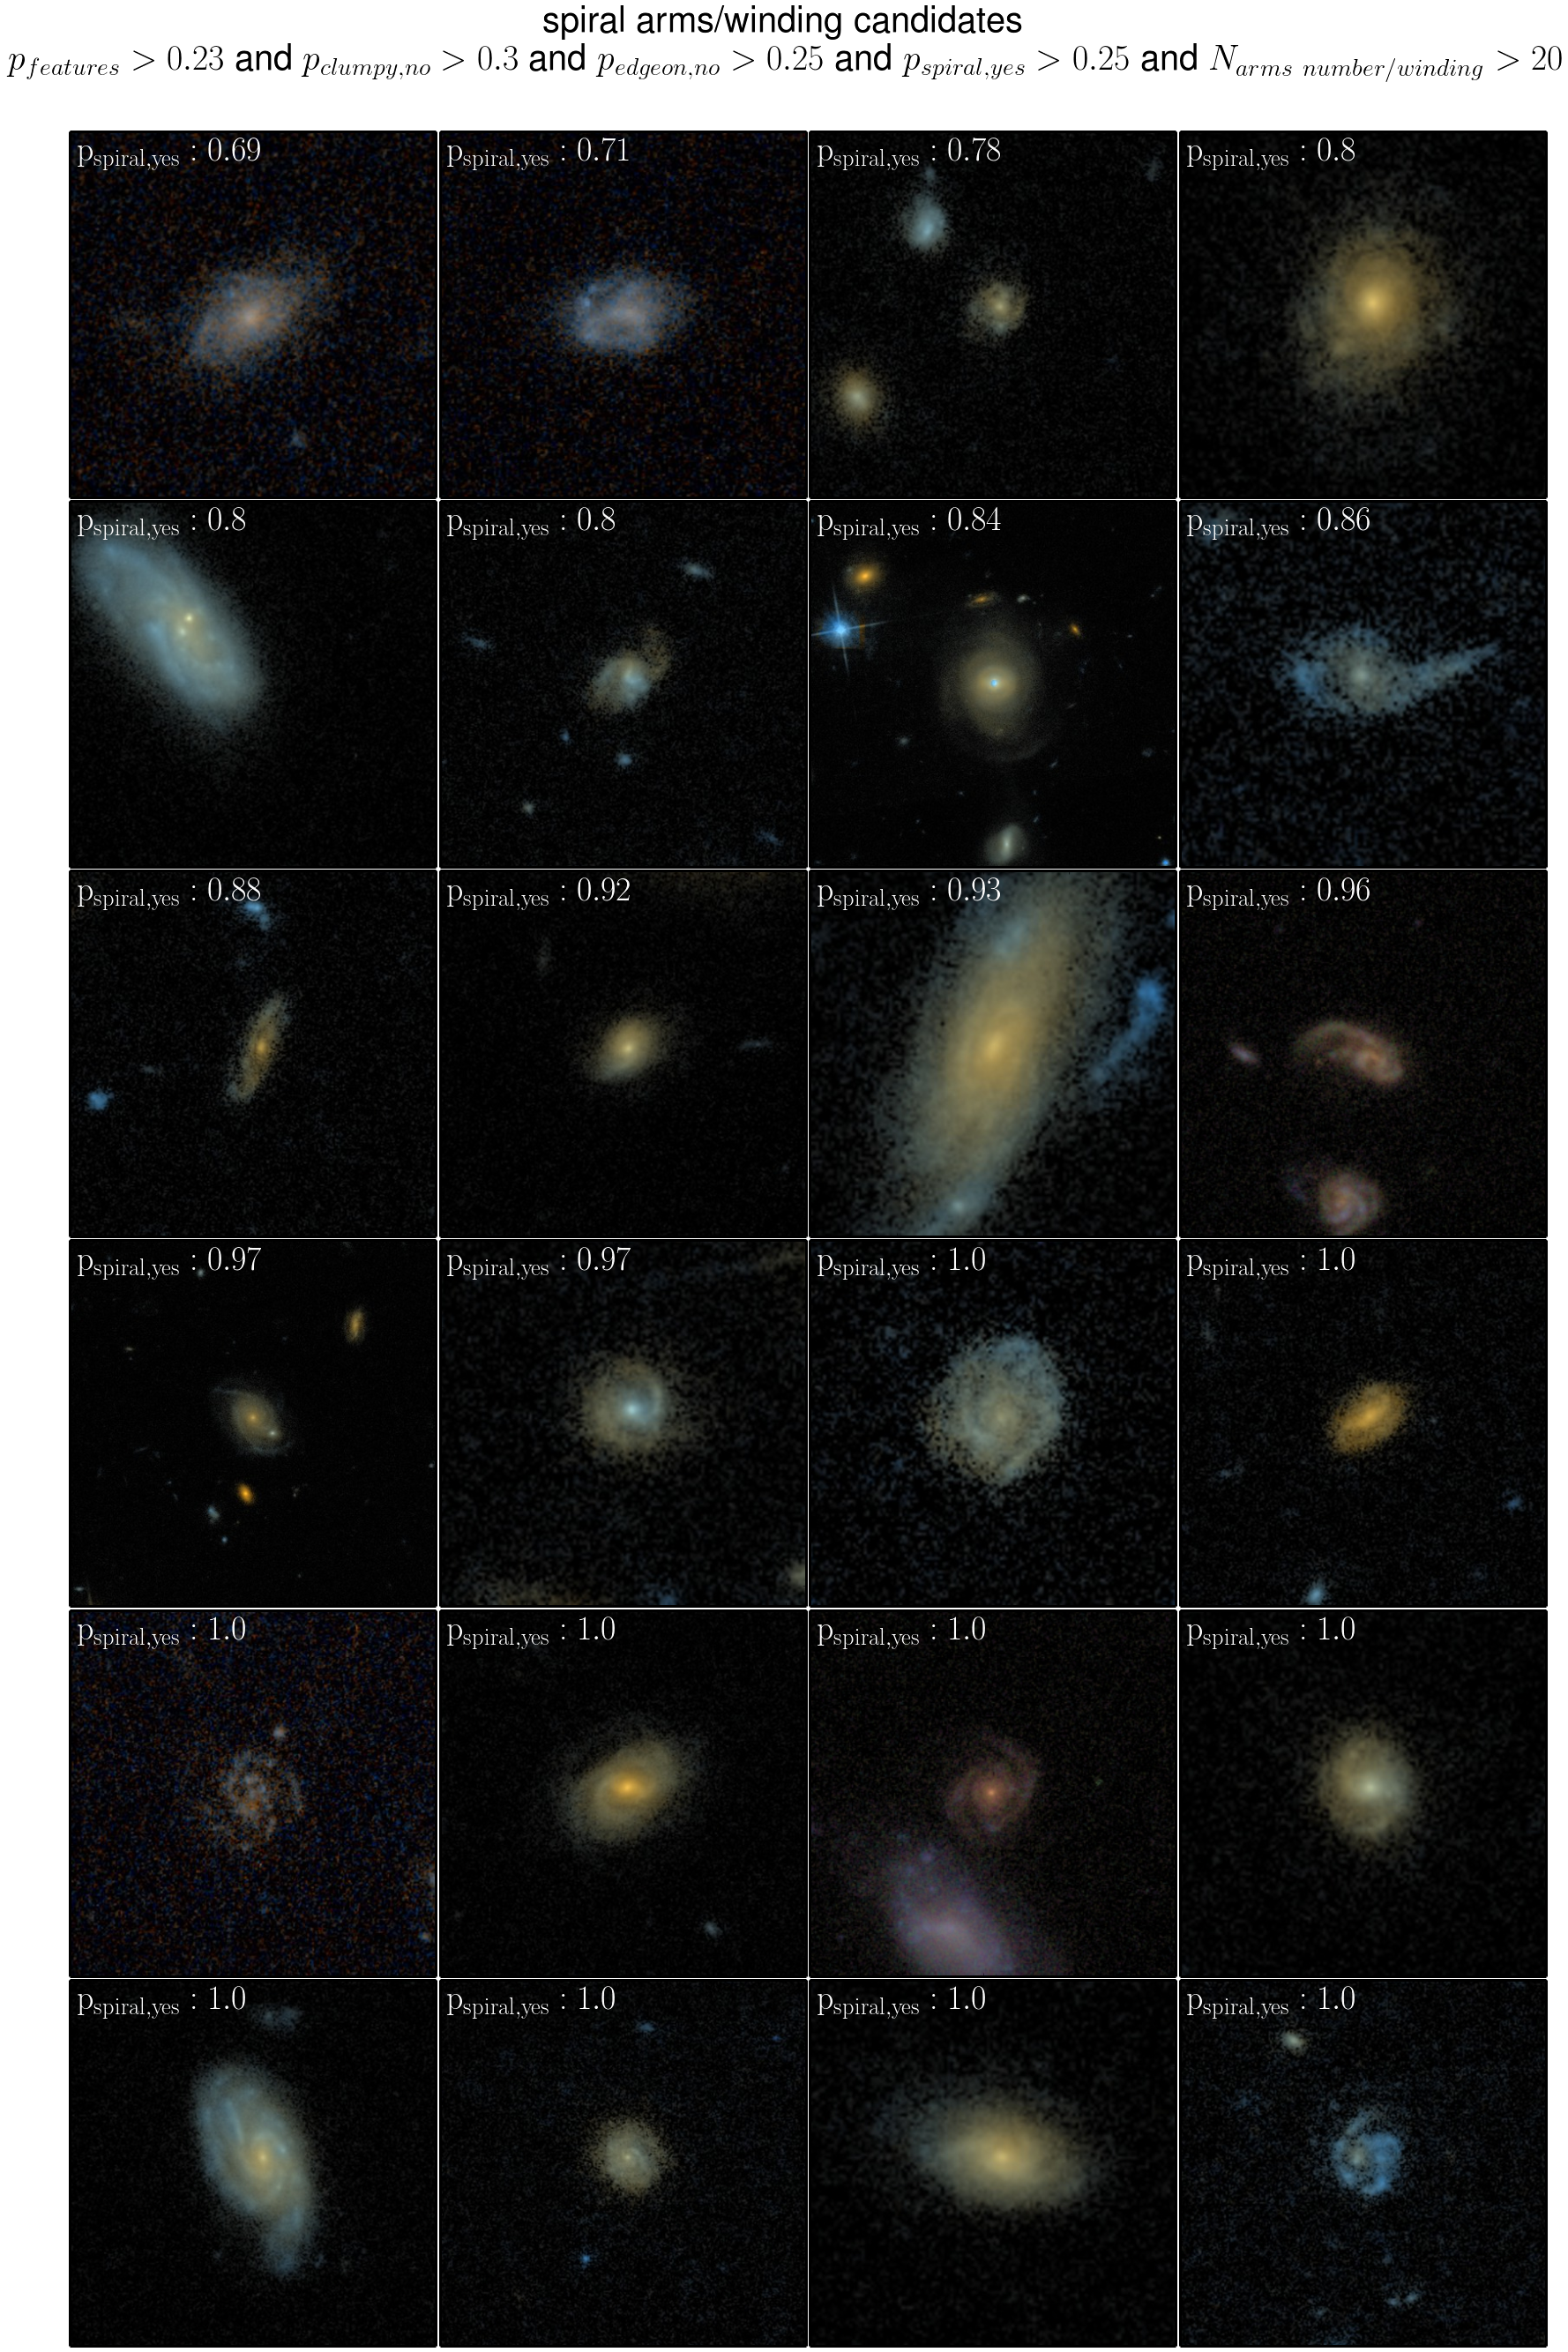

In [12]:
spiral=(data[p_spiral_yes]>p_spiral_yes_cut)

gs=gridspec.GridSpec(6,4)
gs.update(wspace=0.01)
gs.update(hspace=0.01)
 
data_criteria= featured & not_clumpy & not_edgeon & spiral & min_N
these_data=data[data_criteria]

if len(these_data) < 20:
    print 'try new values'

#shuffle which galaxies get displayed     
n_list=np.linspace(0,len(these_data)-1,len(these_data))
random.shuffle(n_list)

#how many galaxies to display?
n_gals = 24
random_n_list = n_list[0:n_gals]

random_gal_list = []
for n in random_n_list:
    random_gal_list.append(these_data[int(n)])

#now we have a random list of galaxies - sort them by p_spiral_yes, column 35
random_gal_list.sort(key=itemgetter(35))

f=plt.figure(figsize=(30,45))
n=0
for i in range (0,6):
    for j in range(0,4):
        ax=plt.subplot(gs[i,j])
        gal = random_gal_list[n] # random galaxy from big list 
        plt.imshow(get_image_from_url(gal['location']))
        plt.tick_params(labelbottom='off',labelleft='off')
        ax.annotate('$\mathrm{p_{spiral,yes}: %s}$'%round(gal[p_spiral_yes],2),fontsize=38,xy=(0.02,.97),
            xycoords='axes fraction',verticalalignment='top',color='white')

       # ax.annotate('$\mathrm{p_{bar}: %s}$\n$\mathrm{p_{spiral}: %s}$'%(round(gal[p_bar_yes],2),round(gal[p_spiral],2)),fontsize=38,xy=(0.02,.02),
        #    xycoords='axes fraction',color='white')

        n+=1
        

f.text(.5,.92,'spiral arms/winding candidates\n$p_{features} > %s$~and~$p_{clumpy,no}>%s$ and $p_{edgeon,no}>%s$ and $p_{spiral,yes}>%s$ and $N_{arms~number/winding}>20$'%(p_features_cut,p_clumpy_no_cut,p_edgeon_no_cut,p_spiral_yes_cut), fontsize=40,ha='center')





## Below: The control sample; galaxies for which asking the spiral number/windy question does *not* make sense. These should have no spirals. 

try new values


IndexError: list index out of range

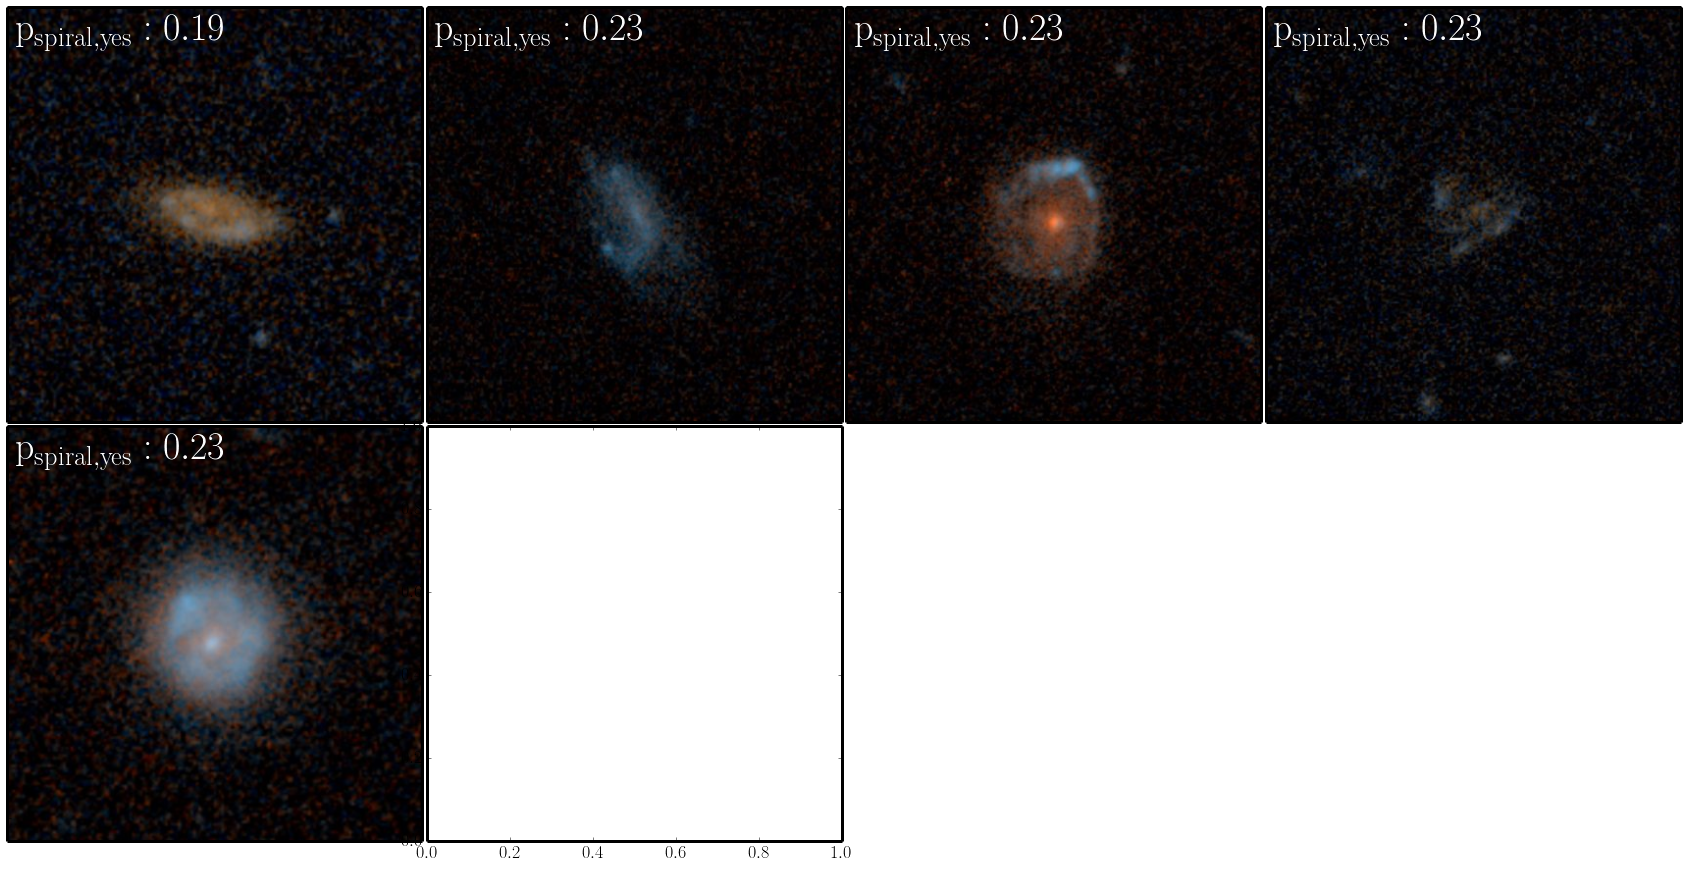

In [13]:
not_spiral=(data[p_spiral_yes]<p_spiral_yes_cut)

gs=gridspec.GridSpec(6,4)
gs.update(wspace=0.01)
gs.update(hspace=0.01)
 
data_criteria= featured & not_clumpy & not_edgeon & not_spiral & min_N
these_data=data[data_criteria]

if len(these_data) < 20:
    print 'try new values'

#shuffle which galaxies get displayed     
n_list=np.linspace(0,len(these_data)-1,len(these_data))
random.shuffle(n_list)

#how many galaxies to display?
n_gals = 24
random_n_list = n_list[0:n_gals]

random_gal_list = []
for n in random_n_list:
    random_gal_list.append(these_data[int(n)])

#now we have a random list of galaxies - sort them by p_spiral_yes, column 35
random_gal_list.sort(key=itemgetter(35))

f=plt.figure(figsize=(30,45))
n=0
for i in range (0,6):
    for j in range(0,4):
        ax=plt.subplot(gs[i,j])
        gal = random_gal_list[n] # random galaxy from big list 
        plt.imshow(get_image_from_url(gal['location']))
        plt.tick_params(labelbottom='off',labelleft='off')
        ax.annotate('$\mathrm{p_{spiral,yes}: %s}$'%round(gal[p_spiral_yes],2),fontsize=38,xy=(0.02,.97),
            xycoords='axes fraction',verticalalignment='top',color='white')

       # ax.annotate('$\mathrm{p_{bar}: %s}$\n$\mathrm{p_{spiral}: %s}$'%(round(gal[p_bar_yes],2),round(gal[p_spiral],2)),fontsize=38,xy=(0.02,.02),
        #    xycoords='axes fraction',color='white')

        n+=1
        

f.text(.5,.92,'Control Sample: non-spiral arms/winding candidates\n$p_{features} > %s$~and~$p_{clumpy,no}>%s$ and $p_{edgeon,no}>%s$ and $p_{spiral,yes}<%s$ and $N_{arms~number/winding}>20$'%(p_features_cut,p_clumpy_no_cut,p_edgeon_no_cut,p_spiral_yes_cut), fontsize=30,ha='center')





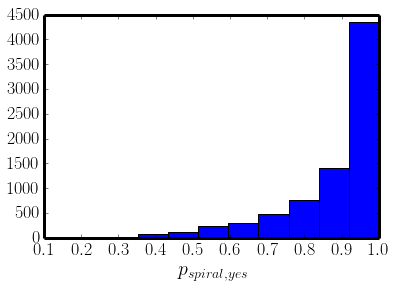

In [14]:
plt.hist(data[featured & not_clumpy & not_edgeon & min_N][p_spiral_yes])
plt.xlabel('$p_{spiral,yes}$',fontsize=20)

## Featured, non-clumpy, not edge-on galaxies which have at least 20 answers to the arm number/winding are rarely not spiral; a cut of p_spiral,yes>0.25 is sufficient. 

In [15]:
cuts['p_spiral_yes_cut']=p_spiral_yes_cut

newtable = cuts.copy(copy_data=True)
fname = 'gzh_cuts.fits'
if os.path.exists(fname):
    os.remove(fname)
newtable.write(fname,format='fits')

In [16]:
len(data[featured & not_clumpy & not_edgeon & min_N])

7771